In [13]:
import itertools
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from mdp import *
from utils import *

%matplotlib inline


In [14]:
gridmdp = GridMDP([[-0.04, -0.04, -0.04, +1],
                   [-0.04, None, -0.04, -1],
                   [-0.04, -0.04, -0.04, -0.04]],
                   terminals=[(3, 2), (3, 1)])

In [15]:
pi = best_policy(gridmdp, value_iteration(gridmdp, .01)[0])
gridmdp.to_arrows(pi)

[['>', '>', '>', '.'], ['^', None, '^', '.'], ['^', '>', '^', '<']]

In [16]:
from utils import print_table
print_table(gridmdp.to_arrows(pi))


>   >      >   .
^   None   ^   .
^   >      ^   <


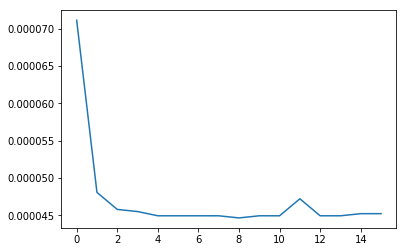

In [17]:
U, iter_time = value_iteration(gridmdp)
plt.plot(iter_time)

[[ 0.29628832  0.253867    0.34475423  0.12987275]
 [ 0.39844322         nan  0.48644002 -1.        ]
 [ 0.50939438  0.64958568  0.79536209  1.        ]]


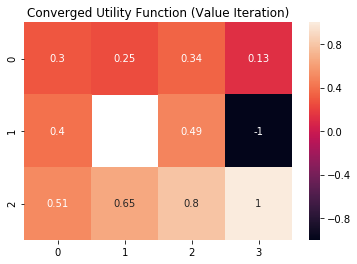

In [18]:




vi_utility_dict, iter_time = value_iteration(gridmdp)
#vi_utility_array = np.ndarray((3,4))

#for key,value in vi_utility_dict.items():
#    vi_utility_array[key[1],key[0]] = value


def utility_dict_toarray(utility_dict, shape):
    utility_array = np.ndarray(shape)
    for (r, c) in itertools.product(range(utility_array.shape[0]), range(utility_array.shape[1])):
        utility_array[r,c] = utility_dict.get((c, r), np.NaN)
    return utility_array

vi_utility_array = utility_dict_toarray(vi_utility_dict, (3,4))


print(vi_utility_array)
#vi_utility_array[[r],[c]] = vi_utility_dict.get((r, c), -2)

utility_array_df = pd.DataFrame(vi_utility_array)

vi_heatmap = sns.heatmap(utility_array_df, annot=True).set_title("Converged Utility Function (Value Iteration)")


>   >      >   .
^   None   ^   .
^   >      ^   <


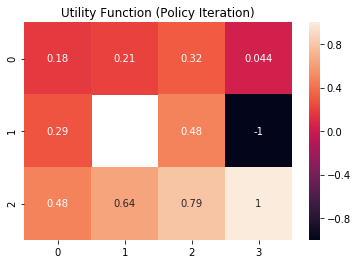

In [19]:
pi, U, iter_time = policy_iteration(gridmdp)
pi_utility_array = utility_dict_toarray(U, (3,4))

utility_array_df = pd.DataFrame(pi_utility_array)

sns.heatmap(utility_array_df, annot=True).set_title("Utility Function (Policy Iteration)")

print_table(gridmdp.to_arrows(pi))

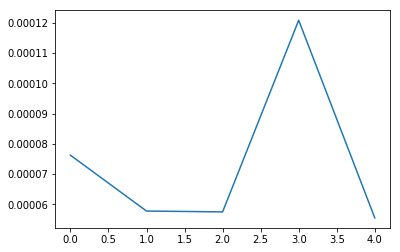

In [21]:
plt.plot(iter_time)